## << 서울 어딘가에서 기차역 가는길을 안전하게! >> 민정, 미경


#### - 출발지 : 서울 어딘가!
#### - 도착지 : 서울 시내 기차역
#### [목표] 안전하게 기차역까지 갈 수 있도록 참고자료를 제공해주자!


<hr>

## Task1. 서울 시내 기차역 정의

<  어떻게?  >   
① 여객(기차) 데이터에서 역 이름 unique한 것을 뽑아내고,   
  이를 공공데이터포털의 코레일 지하철 도로명 주소와 join 한 후, 서울만 뽑아내서 확인해보자!

② 코레일 홈페이지에서 참고해보자!

### 1. 데이터 소개

ⓛ 여객 데이터 : 코레일 소속 기차역 대상 일별 승하차인원을 기간에 따라 조사한 데이터  
② 지하철 주소 데이터 : 코레일 소속 지하철역 대상 지하철역 도로명 주소를 나타낸 데이터

### 2. 데이터 로드

In [42]:
import pandas as pd

In [2]:
train = pd.read_csv("여객/KR_TB_TR_STN_DAY_CON_20200101_20200531_UTF8.csv")

In [3]:
train

,RUN_DT,STN_CD,STN_CD_NM,ABRD_PRNB,GOFF_PRNB
0,20200101,924,송도교,2,-
1,20200101,3900023,서울,"38,306","50,440"
2,20200101,3900025,용산,"19,702","23,967"
3,20200101,3900030,영등포,"10,812","11,125"
4,20200101,3900039,안양,387,269
...,...,...,...,...,...
35035,20200531,3901063,인천공항T2,1,-
35036,20200531,3901065,월포,31,14
35037,20200531,3901066,장사,5,6
35038,20200531,3901067,강구,33,9


In [4]:
addr = pd.read_csv("추가데이터/공공데이터포털/한국철도시설공단_코레일_지하철_주소데이터_20191121..csv", encoding='cp949')

In [5]:
addr

,철도운영기관명,선명,역명,지번주소,도로명주소
0,코레일,1호선,가능,경기도 의정부시 가능동 197-1,경기도 의정부시 평화로 633
1,코레일,1호선,가산디지털단지,서울특별시 금천구 가산동 468-4,서울특별시 금천구 벚꽃로 309
2,코레일,1호선,간석,인천광역시 남동구 간석동 757,인천광역시 남동구 석정로 522-14
3,코레일,1호선,개봉,서울특별시 구로구 개보동 415,서울특별시 구로구 경인로40길 47
4,코레일,1호선,관악,경기도 안양시 만악구 석수동 101-16,경기도 안양시 만안구 경수대로 1273번길 46
...,...,...,...,...,...
270,코레일,수인,월곶,경기도 시흥시 월곶동 992-8,경기도 시흥시 월곶중앙로 14번길 56
271,코레일,수인,인천,NaN,인천 중구 차이나타운로26번길 12-17
272,코레일,수인,인천논현,인천광역시 남동구 논현동 731-4,인천광역시 남동구 청능대로 567
273,코레일,수인,인하대,NaN,인천 남구 독배로 315


### 3. 서울시내 기차역 확인 (데이터)

In [6]:
# 1. train 에서 unique한 역명은 몇 개 있는지 알아보자.
print(train['STN_CD_NM'].unique(), "\n")
print(" *** 중복을 제외한 역의 개수는 : ", len(train['STN_CD_NM'].unique()), "개 이다.")

['송도교' '서울' '용산' '영등포' '안양' '수원' '오산' '서정리' '평택' '성환' '천안' '전의' '조치원' '부강'
 '신탄진' '대전' '옥천' '이원' '지탄' '심천' '영동' '황간' '추풍령' '김천' '구미' '사곡' '약목' '왜관'
 '신동' '대구' '동대구' '경산' '남성현' '청도' '상동' '밀양' '삼랑진' '원동' '물금' '화명' '구포' '사상'
 '부산' '덕소' '양평' '용문' '지평' '석불' '일신' '매곡' '양동' '삼산' '동화' '만종' '원주' '반곡'
 '신림' '제천' '단양' '희방사' '풍기' '영주' '안동' '의성' '탑리' '화본' '신녕' '북영천' '영천' '건천'
 '서경주' '서대전' '계룡' '연산' '논산' '강경' '함열' '익산' '김제' '신태인' '정읍' '백양사' '장성'
 '광주송정' '나주' '다시' '함평' '무안' '몽탄' '일로' '임성리' '목포' '삼례' '전주' '임실' '오수' '남원'
 '곡성' '구례구' '순천' '여천' '여수엑스포' '오송' '청주' '오근장' '청주공항' '증평' '음성' '주덕' '충주'
 '삼탄' '아산' '온양온천' '도고온천' '신례원' '예산' '삽교' '홍성' '광천' '청소' '대천' '웅천' '판교'
 '서천' '장항' '군산' '대야' '행신' '옥수' '왕십리' '청량리' '평내호평' '청평' '가평' '백양리' '강촌'
 '남춘천' '춘천' '옥산' '청리' '상주' '함창' '점촌' '용궁' '개포' '예천' '극락강' '광주' '봉화' '춘양'
 '임기' '현동' '분천' '양원' '승부' '석포' '철암' '동백산' '도계' '신기' '동해' '묵호' '정동진' '강릉'
 '정선' '나전' '아우라지' '쌍룡' '영월' '예미' '민둥산' '사북' '고한' '태백' '부전' '센텀' '신해운대'
 '기장' '좌천' '남창' '덕하' '태화강' '호계' '불국사' '경주' '안강' '하양' '한림정'

In [7]:
# 2. addr에서 unique한 역명은 몇 개 있는지 알아보자.
print(addr['역명'].unique(), "\n")
print(" *** 중복을 제외한 역의 개수는 : ", len(addr['역명'].unique()), "개 이다.")

['가능' '가산디지털단지' '간석' '개봉' '관악' '광명' '광운대' '구로' '구일' '군포' '금정' '금천구청' '남영'
 '노량진' '녹양' '녹천' '당정' '대방' '덕계' '덕정' '도봉' '도봉산' '도원' '도화' '독산' '동두천'
 '동두천중앙' '동암' '동인천' '두정' '망월사' '명학' '방학' '배방' '백운' '병점' '보산' '봉명' '부개'
 '부천' '부평' '서동탄' '서정리' '석계' '석수' '성균관대' '성환' '세류' '세마' '소사' '소요산' '송내'
 '송탄' '수원' '신길' '신도림' '신이문' '신창(순천향대)' '쌍용(나사렛대)' '아산' '안양' '양주' '역곡'
 '영등포' '오류동' '오산' '오산대' '온수' '온양온천' '외대앞' '용산' '월계' '의왕' '의정부' '인천' '제물포'
 '주안' '중동' '지제' '지행' '직산' '진위' '창동' '천안' '평택' '화서' '회기' '회룡' '대곡' '대화'
 '마두' '백석' '삼송' '원당' '원흥' '정발산' '주엽' '화정' '경마공원' '고잔' '과천' '대공원' '대야미'
 '반월' '범계' '산본' '상록수' '선바위' '수리산' '신길온천' '안산' '오이도' '인덕원' '정부과천청사' '정왕'
 '중앙' '초지' '평촌' '한대앞' '경기광주' '곤지암' '부발' '삼동' '세종대왕릉' '신둔도예촌' '여주' '이매'
 '이천' '초월' '판교' '가좌' '강매' '곡산' '공덕' '구리' '국수' '금릉' '금촌' '능곡' '덕소' '도농'
 '도심' '디지털미디어시티' '망우' '문산' '백마' '상봉' '서강대' '서빙고' '서울역' '수색' '신원' '신촌'
 '아신(아세아연합신학대)' '야당' '양수' '양원(서울시북부병원)' '양정' '양평' '오빈' '옥수' '왕십리' '용문'
 '운길산' '운정' '원덕(추읍산)' '월롱(서영대학교)' '응봉' '이촌' '일산' '중랑' '지평' '청량리' '탄현'
 '파주

## 3. 데이터 병합
병합을 편리하게 하기 위해 필요한 컬럼을 제외하고 모두 삭제하자.

In [8]:
train_nm = train['STN_CD_NM'].unique()
train_nms = pd.DataFrame(train_nm, columns = ['역명'])
train_nms

,역명
0,송도교
1,서울
2,용산
3,영등포
4,안양
...,...
238,선평
239,광운대
240,동두천
241,신창


In [9]:
addrs = addr[['선명', '역명', '도로명주소']]
addrs

,선명,역명,도로명주소
0,1호선,가능,경기도 의정부시 평화로 633
1,1호선,가산디지털단지,서울특별시 금천구 벚꽃로 309
2,1호선,간석,인천광역시 남동구 석정로 522-14
3,1호선,개봉,서울특별시 구로구 경인로40길 47
4,1호선,관악,경기도 안양시 만안구 경수대로 1273번길 46
...,...,...,...
270,수인,월곶,경기도 시흥시 월곶중앙로 14번길 56
271,수인,인천,인천 중구 차이나타운로26번길 12-17
272,수인,인천논현,인천광역시 남동구 청능대로 567
273,수인,인하대,인천 남구 독배로 315


In [13]:
# merge
train_addr = pd.merge(train_nms, addrs, on='역명', how='inner')

In [14]:
train_addr

,역명,선명,도로명주소
0,용산,1호선,서울특별시 용산구 한강대로23길 55
1,용산,경의중앙,서울특별시 용산구 한강대로 23길 55
2,영등포,1호선,서울특별시 영등포구 경인로 846
3,안양,1호선,경기도 안양시 만안구 만안로 232
4,수원,1호선,경기도 수원시 팔달구 덕영대로 924
5,수원,분당,경기도 수원시 팔달구 덕영대로 944
6,오산,1호선,경기도 오산시 역광장로 59
7,서정리,1호선,경기도 평택시 탄현로 51
8,평택,1호선,경기도 평택시 평택로 51
9,성환,1호선,충청남도 천안시 서북구 성환읍 성환1로 237-5


In [15]:
# 결과에서 도로명 주소에 서울이 들어간 것 빼고는 다 제외하자.
for i in range(len(train_addr)):
    if "서울" in train_addr['도로명주소'][i]:
        print(train_addr['역명'][i], train_addr['도로명주소'][i])

용산 서울특별시 용산구 한강대로23길 55
용산 서울특별시 용산구 한강대로 23길 55
영등포 서울특별시 영등포구 경인로 846
옥수 서울특별시 성동구 동호로 21
왕십리 서울특별시 성동구 왕십리광장로 17
왕십리 서울특별시 성동구 왕십리광장로 17
청량리 서울특별시 동대문구 왕산로 214
청량리 서울특별시 동대문구 왕산로 214
상봉 서울특별시 중랑구 망우로 297
상봉 서울특별시 중랑구 망우로 297
광운대 서울특별시 노원구 석계로 98-2
광운대 서울특별시 노원구 석계로 98-2


일단 서울역의 경우 표기법이 달라서 나오진 않았지만 원래 있는 게 맞다! (각각 서울/서울역이라서 inner join 시 잡히지 않음)  
어쨌든 뭔가 이상하다.... 일단 기차역을 보아야하는데 도로명 주소가 지하철역 기준이라서  
둘 사이에 좀 차이가 나는 것 같다! 이렇게만 판단하긴 어려울 것 같고, 다른 정보를 확인합시다

### 4. 서울시내 기차역 확인 (코레일 홈페이지)

####  일반철도 (수도권에서 도로명 주소를 확인, 서울인 것만)
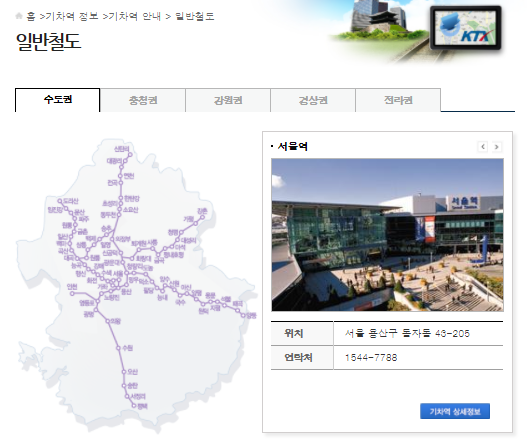  
①	서울/ 경부선 서울 용산구 동자동 43-205   
②	망우/ 중앙선 서울시 중랑구 망우로 55길 11-10(상봉동)– 서울~강릉 KTX 운행    
③	가좌/ 경의선 서울시 서대문구 수색로 27(남가좌동) – 현재 수도권 전철로만 운행  
④	용산/ 경부선 서울시 용산구 한강대로 23길 55       
⑤	영등포/ 경부선 서울시 영등포구 경인로 102길 13       
⑥	노량진/ 경부선 서울시 동작구 노량진로 151번지 ---지금은 수도권 전철만 취급  
⑦	수색/ 경의선 서울시 은평구 수색로 261-1 ---기차역은 아닌 거 같은데 ……

---> 공통적으로 나온건 서울/용산/영등포!

### 5. 서울시내 기차역 확인 (코레일 예매 페이지)
그럼에도 뭘 넣을지 애매해져서 그냥 코레일 예매 페이지에 가보았다!

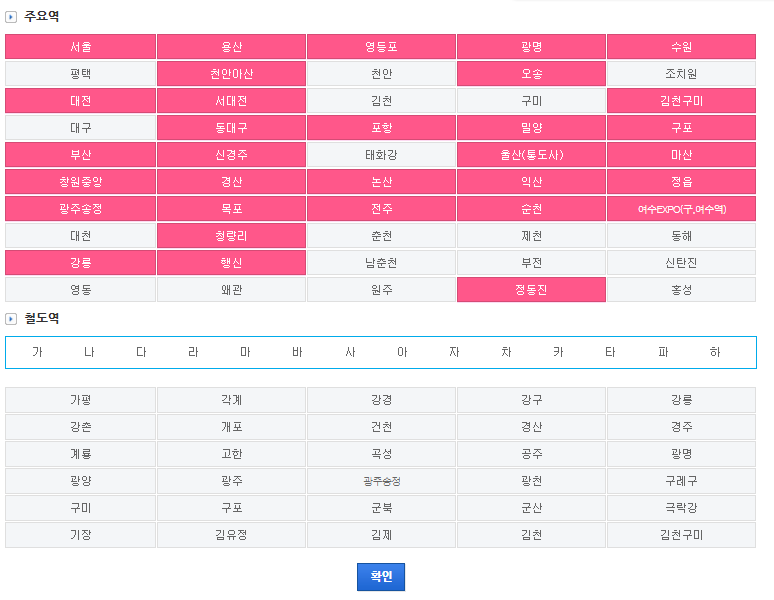  
밑에 가면 굉장히 많은데, 기준을 어떤것에 맞출지도 애매하고 서울시내 기차역은 통상적으로 서울역/용산/영등포이기 때문에    
그냥 기차역 기준은 서울역, 용산역, 영등포역 세개로 하는 것이 낫겠다고 판단했다.  
만약 적는다면, 그냥 서울시내 주요 기차역인 세개를 기준으로 했다  라고 말하면 다들 응응 그건맞지 하지 않을까? 

## [결론] 서울시내 기차역 정의 : 서울역/용산역/영등포역 합 3개!

<hr>

## Task2. 서울시내 기차역의 승하차인원 조사

### 1. 데이터 로드
이때, 2020년 데이터만 사용하도록 한다. 왜? 우리는 어차피 코로나가 터지고 나서의 지하철 승차인원만 중요하니까!

In [16]:
train = pd.read_csv("여객/KR_TB_TR_STN_DAY_CON_20200101_20200531_UTF8.csv")

In [17]:
train

,RUN_DT,STN_CD,STN_CD_NM,ABRD_PRNB,GOFF_PRNB
0,20200101,924,송도교,2,-
1,20200101,3900023,서울,"38,306","50,440"
2,20200101,3900025,용산,"19,702","23,967"
3,20200101,3900030,영등포,"10,812","11,125"
4,20200101,3900039,안양,387,269
...,...,...,...,...,...
35035,20200531,3901063,인천공항T2,1,-
35036,20200531,3901065,월포,31,14
35037,20200531,3901066,장사,5,6
35038,20200531,3901067,강구,33,9


In [18]:
qry = "STN_CD_NM == '서울' or STN_CD_NM == '용산' or STN_CD_NM == '영등포'"
tr = train.query(qry)

In [21]:
tr.reset_index(drop=True, inplace=True) #뽑아냈으면 인덱스도 초기화해주고~
tr

,RUN_DT,STN_CD,STN_CD_NM,ABRD_PRNB,GOFF_PRNB
0,20200101,3900023,서울,"38,306","50,440"
1,20200101,3900025,용산,"19,702","23,967"
2,20200101,3900030,영등포,"10,812","11,125"
3,20200102,3900023,서울,"43,313","49,116"
4,20200102,3900025,용산,"19,179","19,958"
...,...,...,...,...,...
451,20200530,3900025,용산,"18,241","15,721"
452,20200530,3900030,영등포,"10,071","9,592"
453,20200531,3900023,서울,"23,781","29,179"
454,20200531,3900025,용산,"13,586","17,829"


In [22]:
# 간단하게 데이터의 분포를 봅시다.
tr['STN_CD_NM'].value_counts()

영등포    152
용산     152
서울     152
Name: STN_CD_NM, dtype: int64

전에 2020년 1월 1일 ~ 5월 31일 사이에 152개의 날이 있다고 했었다  
그렇다면 이 세 역의 데이터는 매일매일 수집된 것을 볼 수 있다. 역시 핫플레이스~   


### 2. 데이터 전처리
승하차 데이터가 숫자여야 편하겠죠? 전에 썼던 함수를 불러와서 변환해줍시다

In [23]:
# 전에 썼던 함수를 불러옵시다.
def prnb_to_int(bf_series):
    series = bf_series.copy()
    
    #replace ',' -> ''
    for i in range(len(series)):
        series[i] = series[i].replace(',', '')
    
    #check missing values
    print("' - ' count : ", series[series == ' - '].count())
    print("'0' count : ", series[series == '0'].count())
    
    #replace ' - ' -> '0'
    for i in range(len(series)):
        series[i] = series[i].replace(' - ', '0')
    
    #re-check missing values
    print("after modification '0' count : ", series[series == '0'].count())

    #pirnt a describe result
    series = series.astype(str).astype(int).astype("Int64")
    
    for i in range(len(series)):
        if series[i] == 0:
            series[i] = np.nan
            
    print("after modification 0 count : ", series[series == 0].count())
    print("after modification 'nan' count : ", series.isnull().sum())
    print(series.describe())
    
    return series

In [24]:
tr[' ABRD_PRNB '] = prnb_to_int(tr[' ABRD_PRNB '])
tr[' GOFF_PRNB '] = prnb_to_int(tr[' GOFF_PRNB '])

' - ' count :  0
'0' count :  0
after modification '0' count :  0
after modification 0 count :  0
after modification 'nan' count :  0
count      456.000000
mean     17494.866228
std      12511.105403
min       3922.000000
25%       8573.000000
50%      13185.500000
75%      21412.000000
max      77307.000000
Name:  ABRD_PRNB , dtype: float64
' - ' count :  0
'0' count :  0
after modification '0' count :  0
after modification 0 count :  0
after modification 'nan' count :  0
count      456.000000
mean     17742.399123
std      12793.956085
min       4044.000000
25%       8590.750000
50%      13346.000000
75%      21864.000000
max      73680.000000
Name:  GOFF_PRNB , dtype: float64


<ipython-input-24-b2cc661fe68e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr[' ABRD_PRNB '] = prnb_to_int(tr[' ABRD_PRNB '])
<ipython-input-24-b2cc661fe68e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr[' GOFF_PRNB '] = prnb_to_int(tr[' GOFF_PRNB '])


통계를 살짝 보아하니, 승하차의 분포가 되게 비슷한 것을 알 수 있다. (요약통계들이 다 비슷..비슷)

In [25]:
# 추후 분석의 편의를 위해 서울/용산/영등포로 각 데이터를 분할하자.
tr_sul = tr[tr['STN_CD_NM'] == "서울"]
tr_ysan = tr[tr['STN_CD_NM'] == "용산"]
tr_ypo = tr[tr['STN_CD_NM'] == "영등포"]

In [26]:
print(len(tr_sul), len(tr_ysan), len(tr_ypo))

152 152 152


In [27]:
#역시 뽑아냈으면 인덱스를 초기화해주자!
tr_sul.reset_index(drop=True, inplace=True)
tr_ypo.reset_index(drop=True, inplace=True)
tr_ysan.reset_index(drop=True, inplace=True)

In [28]:
tr_sul

,RUN_DT,STN_CD,STN_CD_NM,ABRD_PRNB,GOFF_PRNB
0,20200101,3900023,서울,38306,50440
1,20200102,3900023,서울,43313,49116
2,20200103,3900023,서울,55415,58289
3,20200104,3900023,서울,51811,51642
4,20200105,3900023,서울,44426,51119
...,...,...,...,...,...
147,20200527,3900023,서울,28580,29088
148,20200528,3900023,서울,30657,32026
149,20200529,3900023,서울,40787,39010
150,20200530,3900023,서울,29570,25796


In [29]:
tr_ysan

,RUN_DT,STN_CD,STN_CD_NM,ABRD_PRNB,GOFF_PRNB
0,20200101,3900025,용산,19702,23967
1,20200102,3900025,용산,19179,19958
2,20200103,3900025,용산,23303,24878
3,20200104,3900025,용산,27451,27122
4,20200105,3900025,용산,22372,25421
...,...,...,...,...,...
147,20200527,3900025,용산,12833,12808
148,20200528,3900025,용산,13819,13757
149,20200529,3900025,용산,19287,18114
150,20200530,3900025,용산,18241,15721


In [30]:
tr_ypo

,RUN_DT,STN_CD,STN_CD_NM,ABRD_PRNB,GOFF_PRNB
0,20200101,3900030,영등포,10812,11125
1,20200102,3900030,영등포,11361,10732
2,20200103,3900030,영등포,12368,13173
3,20200104,3900030,영등포,14260,14459
4,20200105,3900030,영등포,12223,13150
...,...,...,...,...,...
147,20200527,3900030,영등포,7812,7616
148,20200528,3900030,영등포,8060,8190
149,20200529,3900030,영등포,10333,10416
150,20200530,3900030,영등포,10071,9592


### 3. 데이터 시각화

#### 간단한 EDA를 통해 서울/용산/영등포의 평균 승하차인원을 비교분석해봅시다.

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

In [67]:
pd.set_option('max_columns', 24,'max_rows', 20) 
# pd.set_option('display.max_rows', None) 
plt.style.use('seaborn')
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [56]:
#평균을 구하자!
g_abrd = tr.groupby(['STN_CD_NM']).mean()[' ABRD_PRNB ']
g_goff = tr.groupby(['STN_CD_NM']).mean()[' GOFF_PRNB ']

In [57]:
g_abrd

STN_CD_NM
서울     29480.210526
영등포     8457.546053
용산     14546.842105
Name:  ABRD_PRNB , dtype: float64

In [58]:
g_goff

STN_CD_NM
서울     30119.309211
영등포     8496.250000
용산     14611.638158
Name:  GOFF_PRNB , dtype: float64

In [63]:
value =  np.vstack([g_abrd.values, g_goff.values])
value

array([[29480.21052632,  8457.54605263, 14546.84210526],
       [30119.30921053,  8496.25      , 14611.63815789]])

In [62]:
index = g_abrd.index
index

Index(['서울', '영등포', '용산'], dtype='object', name='STN_CD_NM')

In [72]:
df = pd.DataFrame(value, columns = ['서울', '영등포', '용산'])

## 서울시내 주요 기차역 3개별 승하차인원 평균

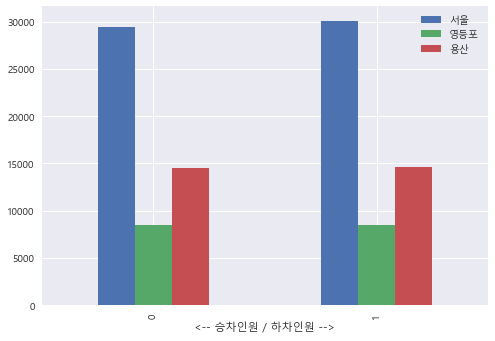

In [85]:
df.plot(kind='bar')
plt.legend(["서울", "영등포", "용산"])
plt.xlabel("<-- 승차인원 / 하차인원 -->")
plt.show()
#이거 ... 0, 1 말고 승차인원/하차인원으로 하는거 아시는 분??? 

어쨌든 세 역의 승하차 인원을 비교해보았을 때, 승하차 인원 모두 서울역>용산>영등포 순서로 많았으며,  
각 역의 승하차 인원의 평균은 비슷했다.

## 주말/평일의 승하차인원이 다를까?
다른지 봐볼까? datetime 을 이용해서 문자로된 날짜를 날짜변수로 바꾸어보자.

In [97]:
import datetime

tr_sul['RUN_DT']

0      20200101
1      20200102
2      20200103
3      20200104
4      20200105
         ...   
147    20200527
148    20200528
149    20200529
150    20200530
151    20200531
Name: RUN_DT, Length: 152, dtype: int64

#### 1. Datetime으로 변환

In [116]:
# 문자로 된 날짜를 datetime으로 변환해주는 함수 to_datetime 선언
def to_datetime(series):
    date = []
    for i in range(len(series)):
         date.append(datetime.datetime.strptime(series[i].astype(str), "%Y%m%d").date())
    return date

In [115]:
tr_sul['DATE'] = pd.DataFrame(to_datetime(tr_sul['RUN_DT']))
tr_ypo['DATE'] = pd.DataFrame(to_datetime(tr_ypo['RUN_DT']))
tr_ysan['DATE'] = pd.DataFrame(to_datetime(tr_ysan['RUN_DT']))

<ipython-input-115-159d9cd8fa5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr_sul['DATE'] = pd.DataFrame(to_datetime(tr_sul['RUN_DT']))
<ipython-input-115-159d9cd8fa5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr_ypo['DATE'] = pd.DataFrame(to_datetime(tr_ypo['RUN_DT']))
<ipython-input-115-159d9cd8fa5c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [139]:
tr['DATE'] = pd.DataFrame(to_datetime(tr['RUN_DT']))

<ipython-input-139-1fb6d6410e4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr['DATE'] = pd.DataFrame(to_datetime(tr['RUN_DT']))


In [117]:
tr_sul

,RUN_DT,STN_CD,STN_CD_NM,ABRD_PRNB,GOFF_PRNB,DATE
0,20200101,3900023,서울,38306,50440,2020-01-01
1,20200102,3900023,서울,43313,49116,2020-01-02
2,20200103,3900023,서울,55415,58289,2020-01-03
3,20200104,3900023,서울,51811,51642,2020-01-04
4,20200105,3900023,서울,44426,51119,2020-01-05
...,...,...,...,...,...,...
147,20200527,3900023,서울,28580,29088,2020-05-27
148,20200528,3900023,서울,30657,32026,2020-05-28
149,20200529,3900023,서울,40787,39010,2020-05-29
150,20200530,3900023,서울,29570,25796,2020-05-30


In [118]:
tr_ysan

,RUN_DT,STN_CD,STN_CD_NM,ABRD_PRNB,GOFF_PRNB,DATE
0,20200101,3900025,용산,19702,23967,2020-01-01
1,20200102,3900025,용산,19179,19958,2020-01-02
2,20200103,3900025,용산,23303,24878,2020-01-03
3,20200104,3900025,용산,27451,27122,2020-01-04
4,20200105,3900025,용산,22372,25421,2020-01-05
...,...,...,...,...,...,...
147,20200527,3900025,용산,12833,12808,2020-05-27
148,20200528,3900025,용산,13819,13757,2020-05-28
149,20200529,3900025,용산,19287,18114,2020-05-29
150,20200530,3900025,용산,18241,15721,2020-05-30


In [119]:
tr_ypo

,RUN_DT,STN_CD,STN_CD_NM,ABRD_PRNB,GOFF_PRNB,DATE
0,20200101,3900030,영등포,10812,11125,2020-01-01
1,20200102,3900030,영등포,11361,10732,2020-01-02
2,20200103,3900030,영등포,12368,13173,2020-01-03
3,20200104,3900030,영등포,14260,14459,2020-01-04
4,20200105,3900030,영등포,12223,13150,2020-01-05
...,...,...,...,...,...,...
147,20200527,3900030,영등포,7812,7616,2020-05-27
148,20200528,3900030,영등포,8060,8190,2020-05-28
149,20200529,3900030,영등포,10333,10416,2020-05-29
150,20200530,3900030,영등포,10071,9592,2020-05-30


#### 2. 요일 추출 (0: 월요일 ~ 6: 일요일)

In [121]:
def to_weekday(series):
    wkday = []
    for i in range(len(series)):
        wkday.append(series[i].weekday())
    return wkday

In [122]:
tr_sul['WEEKDAY'] = pd.DataFrame(to_weekday(tr_sul['DATE']))
tr_ypo['WEEKDAY'] = pd.DataFrame(to_weekday(tr_ypo['DATE']))
tr_ysan['WEEKDAY'] = pd.DataFrame(to_weekday(tr_ysan['DATE']))

<ipython-input-122-ce9d011d0c2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr_sul['WEEKDAY'] = pd.DataFrame(to_weekday(tr_sul['DATE']))
<ipython-input-122-ce9d011d0c2c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr_ypo['WEEKDAY'] = pd.DataFrame(to_weekday(tr_ypo['DATE']))
<ipython-input-122-ce9d011d0c2c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [140]:
tr['WEEKDAY'] = pd.DataFrame(to_weekday(tr['DATE']))

<ipython-input-140-b6c537eeae2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr['WEEKDAY'] = pd.DataFrame(to_weekday(tr['DATE']))


In [123]:
tr_sul

,RUN_DT,STN_CD,STN_CD_NM,ABRD_PRNB,GOFF_PRNB,DATE,WEEKDAY
0,20200101,3900023,서울,38306,50440,2020-01-01,2
1,20200102,3900023,서울,43313,49116,2020-01-02,3
2,20200103,3900023,서울,55415,58289,2020-01-03,4
3,20200104,3900023,서울,51811,51642,2020-01-04,5
4,20200105,3900023,서울,44426,51119,2020-01-05,6
...,...,...,...,...,...,...,...
147,20200527,3900023,서울,28580,29088,2020-05-27,2
148,20200528,3900023,서울,30657,32026,2020-05-28,3
149,20200529,3900023,서울,40787,39010,2020-05-29,4
150,20200530,3900023,서울,29570,25796,2020-05-30,5


In [124]:
tr_ypo

,RUN_DT,STN_CD,STN_CD_NM,ABRD_PRNB,GOFF_PRNB,DATE,WEEKDAY
0,20200101,3900030,영등포,10812,11125,2020-01-01,2
1,20200102,3900030,영등포,11361,10732,2020-01-02,3
2,20200103,3900030,영등포,12368,13173,2020-01-03,4
3,20200104,3900030,영등포,14260,14459,2020-01-04,5
4,20200105,3900030,영등포,12223,13150,2020-01-05,6
...,...,...,...,...,...,...,...
147,20200527,3900030,영등포,7812,7616,2020-05-27,2
148,20200528,3900030,영등포,8060,8190,2020-05-28,3
149,20200529,3900030,영등포,10333,10416,2020-05-29,4
150,20200530,3900030,영등포,10071,9592,2020-05-30,5


In [125]:
tr_ysan

,RUN_DT,STN_CD,STN_CD_NM,ABRD_PRNB,GOFF_PRNB,DATE,WEEKDAY
0,20200101,3900025,용산,19702,23967,2020-01-01,2
1,20200102,3900025,용산,19179,19958,2020-01-02,3
2,20200103,3900025,용산,23303,24878,2020-01-03,4
3,20200104,3900025,용산,27451,27122,2020-01-04,5
4,20200105,3900025,용산,22372,25421,2020-01-05,6
...,...,...,...,...,...,...,...
147,20200527,3900025,용산,12833,12808,2020-05-27,2
148,20200528,3900025,용산,13819,13757,2020-05-28,3
149,20200529,3900025,용산,19287,18114,2020-05-29,4
150,20200530,3900025,용산,18241,15721,2020-05-30,5


### 3. 요일 한글 변환

In [126]:
def weekday_categorize(num):
    if num == 0:
        return "월"
    elif num == 1:
        return "화"
    elif num == 2:
        return "수"
    elif num == 3:
        return "목"
    elif num == 4:
        return "금"
    elif num == 5:
        return "토"
    else:
        return "일"

tr_sul['WEEKDAY'] = tr_sul['WEEKDAY'].apply(weekday_categorize)

<ipython-input-126-7d886259fd05>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr_sul['WEEKDAY'] = tr_sul['WEEKDAY'].apply(weekday_categorize)


In [128]:
tr_sul

,RUN_DT,STN_CD,STN_CD_NM,ABRD_PRNB,GOFF_PRNB,DATE,WEEKDAY
0,20200101,3900023,서울,38306,50440,2020-01-01,수
1,20200102,3900023,서울,43313,49116,2020-01-02,목
2,20200103,3900023,서울,55415,58289,2020-01-03,금
3,20200104,3900023,서울,51811,51642,2020-01-04,토
4,20200105,3900023,서울,44426,51119,2020-01-05,일
...,...,...,...,...,...,...,...
147,20200527,3900023,서울,28580,29088,2020-05-27,수
148,20200528,3900023,서울,30657,32026,2020-05-28,목
149,20200529,3900023,서울,40787,39010,2020-05-29,금
150,20200530,3900023,서울,29570,25796,2020-05-30,토


In [129]:
#잘 되었으니 나머지 두개도 해봅시다.
tr_ypo['WEEKDAY'] = tr_ypo['WEEKDAY'].apply(weekday_categorize)
tr_ysan['WEEKDAY'] = tr_ysan['WEEKDAY'].apply(weekday_categorize)

<ipython-input-129-5435a13e5ed8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr_ypo['WEEKDAY'] = tr_ypo['WEEKDAY'].apply(weekday_categorize)
<ipython-input-129-5435a13e5ed8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr_ysan['WEEKDAY'] = tr_ysan['WEEKDAY'].apply(weekday_categorize)


In [130]:
tr_ypo

,RUN_DT,STN_CD,STN_CD_NM,ABRD_PRNB,GOFF_PRNB,DATE,WEEKDAY
0,20200101,3900030,영등포,10812,11125,2020-01-01,수
1,20200102,3900030,영등포,11361,10732,2020-01-02,목
2,20200103,3900030,영등포,12368,13173,2020-01-03,금
3,20200104,3900030,영등포,14260,14459,2020-01-04,토
4,20200105,3900030,영등포,12223,13150,2020-01-05,일
...,...,...,...,...,...,...,...
147,20200527,3900030,영등포,7812,7616,2020-05-27,수
148,20200528,3900030,영등포,8060,8190,2020-05-28,목
149,20200529,3900030,영등포,10333,10416,2020-05-29,금
150,20200530,3900030,영등포,10071,9592,2020-05-30,토


In [131]:
tr_ysan

,RUN_DT,STN_CD,STN_CD_NM,ABRD_PRNB,GOFF_PRNB,DATE,WEEKDAY
0,20200101,3900025,용산,19702,23967,2020-01-01,수
1,20200102,3900025,용산,19179,19958,2020-01-02,목
2,20200103,3900025,용산,23303,24878,2020-01-03,금
3,20200104,3900025,용산,27451,27122,2020-01-04,토
4,20200105,3900025,용산,22372,25421,2020-01-05,일
...,...,...,...,...,...,...,...
147,20200527,3900025,용산,12833,12808,2020-05-27,수
148,20200528,3900025,용산,13819,13757,2020-05-28,목
149,20200529,3900025,용산,19287,18114,2020-05-29,금
150,20200530,3900025,용산,18241,15721,2020-05-30,토


### 4. 각 기차역 별로 요일별 차이가 있는지 간단히 보기

In [179]:
# 그래프 그리기 쉽게 승/하차 인원과 요일로 구성되어 있는 df를 만드는 함수 정의하기
def to_plot_prnb(df):
    abrd = df.groupby(['WEEKDAY']).mean()[' ABRD_PRNB ']
    goff = df.groupby(['WEEKDAY']).mean()[' GOFF_PRNB ']
    
    avg = pd.concat([abrd, goff], axis=1)
    avg.rename(columns = {' ABRD_PRNB ' : '승차인원'}, inplace = True)
    avg.rename(columns = {' GOFF_PRNB ' : '하차인원'}, inplace = True)
    
    return avg

### 서울역 요일별 승하차 인원 비교

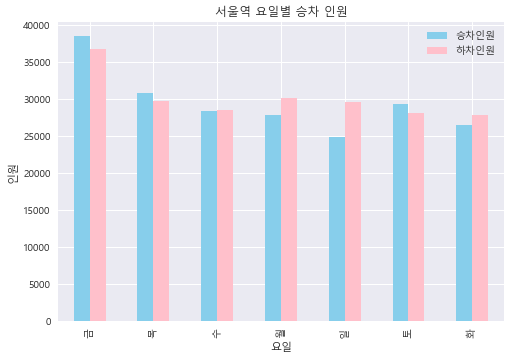

In [186]:
sul_avg = to_plot_prnb(tr_sul)
sul_avg.plot(kind='bar', color=['skyblue', 'pink'])
plt.title("서울역 요일별 승차 인원")
plt.xlabel("요일")
plt.ylabel("인원")
plt.show()

금요일이 유난히 많은걸 볼 수 있다.

In [185]:
sul_avg 
#형태 확인

,승차인원,하차인원
WEEKDAY,,
금,38498.181818,36795.500000
목,30866.227273,29667.590909
수,28318.636364,28544.272727
월,27873.857143,30133.857143
일,24794.136364,29622.590909
토,29289.318182,28092.636364
화,26513.238095,27877.476190


### 용산역 요일별 승하차 인원 비교

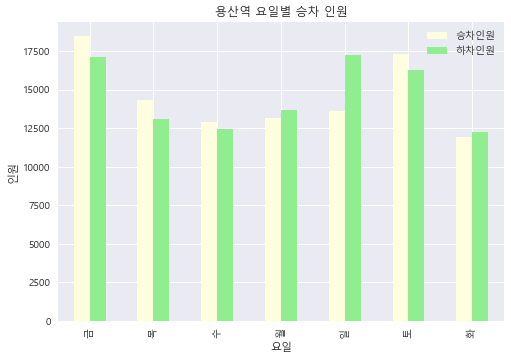

In [192]:
ysan_avg = to_plot_prnb(tr_ysan)
ysan_avg.plot(kind='bar', color=['lightyellow', 'lightgreen'])
plt.title("용산역 요일별 승차 인원")
plt.xlabel("요일")
plt.ylabel("인원")
plt.show()

금, 토, 일에 인원이 많았으며  
일요일의 경우 유난히 승/하차 인원의 차이가 큰 것을 볼 수 있다. (하차가 훨씬 많다.)

### 영등포역 요일별 승하차 인원 비교

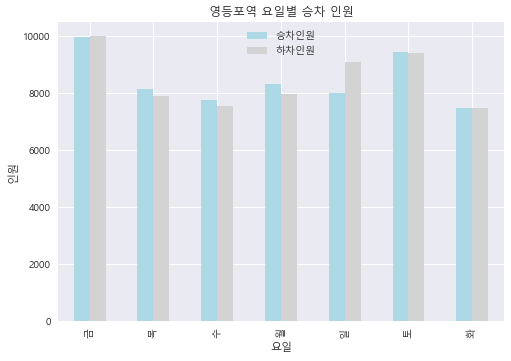

In [203]:
ypo_avg = to_plot_prnb(tr_ypo)
ypo_avg.plot(kind='bar', color=['lightblue', 'lightgray'])
plt.title("영등포역 요일별 승차 인원")
plt.xlabel("요일")
plt.ylabel("인원")
plt.show()

금, 토가 많았고 일요일 정도 하차인원이 유난히 더 많아보인다.

## 앞으로 ? 

내가 생각했던 것이, 출발지(예를 들어 신촌 어딘가)에서 내가 서울역에 가야하는데 버스를 탈까, 지하철을 탈까 고민된다면  
해당 요일, 해당 시간대의 유동인구/승하차인원을 분석해서 더 적은 쪽을 안전하게 선택하게끔 하는 것이었는데,   
일단 EDA는 요정도 하고 (시간이 없어서 절대 아님)  
차후에 버스 데이터와 어떤식으로 콜라보레이션 할 수 있을지 합의한 후에 분석을 이어가는 것이 좋겠다.